# Deep neural networks Using Keras

## Description

This work provides an opportunity to showcase skills in building, training, and optimizing neural networks for solving regression problems. The steps used are:

-Train a neural network using Keras, applying its robust functionality to address a regression problem effectively.

-Perform data preprocessing steps, including data cleaning, normalization, and feature engineering, to ensure the input data is prepared for model training.

-Experiment with hyperparameter tuning, such as learning rates, batch sizes, and activation functions, to enhance model performance.

-Explore different model architectures, including the number of layers and neurons, to identify configurations that yield optimal results.

-Evaluate the model’s performance using appropriate metrics for regression, such as Mean Squared Error (MSE) or Mean Absolute Error (MAE).


In [ ]:
!pip install tensorflow==2.12
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
# setting up the notebook with important libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Dataset
There are 13 features to predict the sale price of products in the dataset


## Read the datafiles

In [4]:

# Next, You need to upload tables to your G drive -  then you may need to update  paths below

# load the  data into a pandas dataframe for easy viewing and manipulation
df_train_y = pd.read_csv("/content/drive/My Drive/y_train.csv", index_col=0)
df_test_y = pd.read_csv("/content/drive/My Drive/y_test.csv", index_col=0)
df_train_x  =  pd.read_csv("/content/drive/My Drive/X_train.csv", index_col=0)
df_test_x =  pd.read_csv("/content/drive/My Drive/X_test.csv",index_col=0)

## Check the datatypes

In [5]:
print (df_train_x.info())
print (df_test_x.info())
print (df_train_y.info())
print (df_test_y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       102 non-null    float64
 1   1       102 non-null    float64
 2   2       102 non-null    float64
 3   3       

## Baseline model

### Convert the data to numpy array






In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(df_train_x, df_train_y, random_state=42)
x_test = df_test_x.to_numpy()
y_test = df_test_y.to_numpy()

**Standard scaler has been used to standardize features by removing the mean and scaling to unit variance.**

In [ ]:
scaler = StandardScaler()
# Fit the scaler on the training data and transform the training and validation data
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
# Transform the test data
x_test_scaled = scaler.transform(x_test)

In [8]:
print("x_train_scaled:", x_train_scaled.shape)
print("x_test_scaled:", x_test_scaled.shape)

x_train_scaled: (303, 13)
x_test_scaled: (102, 13)


In [9]:
# Set the random seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)


### Baseline neural network model with 'one single fully-connected hidden layer with the same number of neurons as input features (i.e. 13 neurons), 'No activation function','adam optimisation algorithm, 'mean squared error loss function'

In [10]:
model = keras.models.Sequential([
   keras.layers.Dense(13, activation="relu", input_shape=x_train_scaled.shape[1:]),
  keras.layers.Dense(1) # SINGLE NEURON, NO ACTIVATION
])

The first input_layer creates a Sequential model, which is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This input layer recieves the scaled x_train_scaled data (X).
Next we add a Dense hidden layer:
This layer has 13 fully-connected neurons, using ReLU activation.
Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs.
It also manages a vector of bias terms (one per neuron).
Finally, we add a Dense output layer with 1 neuron.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

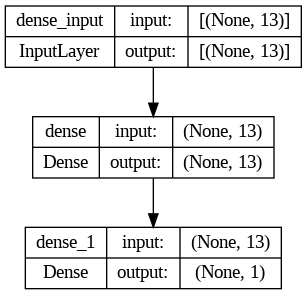

In [13]:
keras.utils.plot_model(model, show_shapes=True)

### Compiling the model: The ADAM optimization algorithm has to be used to optimize mean squared error loss function



In [14]:
model.compile(optimizer='adam',loss="mse", metrics=["RootMeanSquaredError"])

In [15]:
history = model.fit(x_train_scaled, y_train, epochs=20, validation_data = (x_valid_scaled, y_valid))
mse_test, rmse_test = model.evaluate(x_test_scaled, y_test)
x_new = x_test_scaled[:3]
y_predict = model.predict(x_new)
print(y_predict)
print(mse_test)
print(rmse_test)

Epoch 1/20
10/10 [==============================] - 2s 52ms/step - loss: 637.4106 - root_mean_squared_error: 25.2470 - val_loss: 520.5307 - val_root_mean_squared_error: 22.8151
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 630.5430 - root_mean_squared_error: 25.1106 - val_loss: 515.6906 - val_root_mean_squared_error: 22.7088
Epoch 3/20
10/10 [==============================] - 0s 12ms/step - loss: 623.8774 - root_mean_squared_error: 24.9775 - val_loss: 511.1112 - val_root_mean_squared_error: 22.6078
Epoch 4/20
10/10 [==============================] - 0s 16ms/step - loss: 617.5906 - root_mean_squared_error: 24.8514 - val_loss: 506.6960 - val_root_mean_squared_error: 22.5099
Epoch 5/20
10/10 [==============================] - 0s 15ms/step - loss: 611.5764 - root_mean_squared_error: 24.7301 - val_loss: 502.3300 - val_root_mean_squared_error: 22.4127
Epoch 6/20
10/10 [==============================] - 0s 14ms/step - loss: 605.6019 - root_mean_squared_error: 24.609

In [16]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 10}

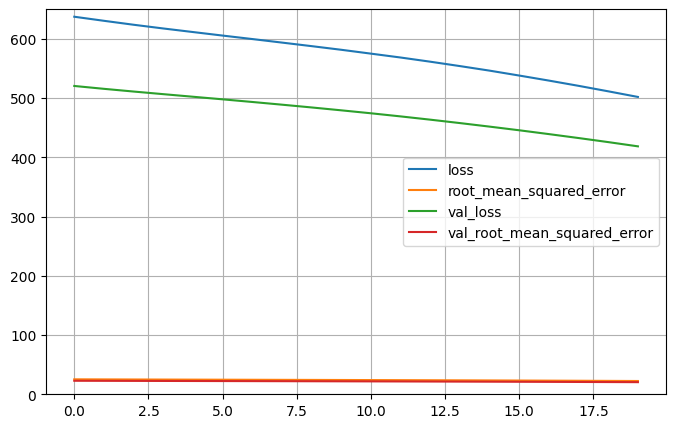

In [17]:
history.history.keys()
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 650)
plt.show()

###Key observations:

Both the **training loss and the validation loss decrease with increase in number of epochs.**
still, there is much difference between the loss and val loss. The rmse and val-rmse are decreasing.
Clearly, the model has not quite converged yet, as the validation loss is still going down, so probably training should be continued.

## Deeper Network [1 point]

Construct and evaluate a model with 2 dense layers having a smaller number of neurons (e.g. 16, 8).

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate

# Input layer
input_ = Input(shape=x_train_scaled.shape[1:])
model_DN = tf.keras.Sequential([input_, tf.keras.layers.Dense(16, activation="relu"), tf.keras.layers.Dense(8,  activation="relu"), tf.keras.layers.Dense(1)])

print (model_DN.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                224       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


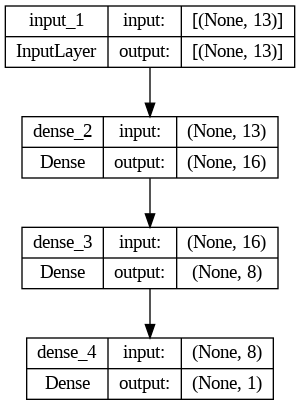

In [19]:
keras.utils.plot_model(model_DN, show_shapes=True)

In [20]:
model_DN.compile(loss = "mse", optimizer = 'adam', metrics = ["RootMeanSquaredError"])

history_DN = model_DN.fit(x_train_scaled, y_train, epochs=20, validation_data = (x_valid_scaled, y_valid))
mse_test, rmse_test = model_DN.evaluate(x_test_scaled, y_test)
x_new = x_test_scaled[:3]
y_predict = model_DN.predict(x_new)
print(y_predict)
print(mse_test)
print(rmse_test)


Epoch 1/20
10/10 [==============================] - 4s 124ms/step - loss: 601.5970 - root_mean_squared_error: 24.5275 - val_loss: 493.4777 - val_root_mean_squared_error: 22.2144
Epoch 2/20
10/10 [==============================] - 0s 24ms/step - loss: 592.0654 - root_mean_squared_error: 24.3324 - val_loss: 485.0981 - val_root_mean_squared_error: 22.0249
Epoch 3/20
10/10 [==============================] - 0s 22ms/step - loss: 581.9507 - root_mean_squared_error: 24.1237 - val_loss: 476.3141 - val_root_mean_squared_error: 21.8246
Epoch 4/20
10/10 [==============================] - 0s 26ms/step - loss: 570.9717 - root_mean_squared_error: 23.8950 - val_loss: 466.3304 - val_root_mean_squared_error: 21.5947
Epoch 5/20
10/10 [==============================] - 0s 27ms/step - loss: 557.8726 - root_mean_squared_error: 23.6193 - val_loss: 454.9268 - val_root_mean_squared_error: 21.3290
Epoch 6/20
10/10 [==============================] - 0s 26ms/step - loss: 542.0035 - root_mean_squared_error: 23.28

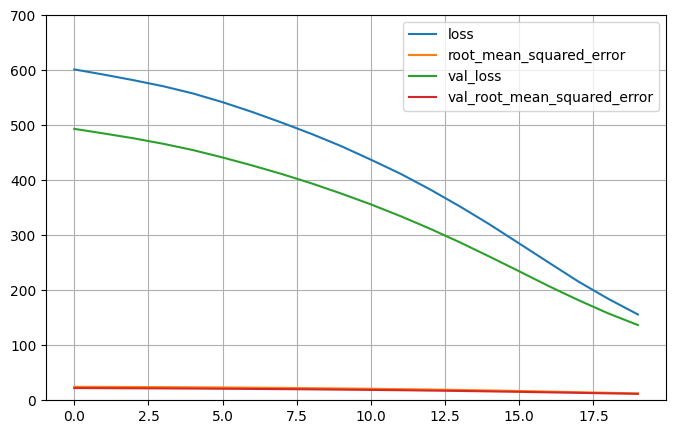

In [21]:
pd.DataFrame(history_DN.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 700)
plt.show()

In [22]:
from sklearn.metrics import make_scorer, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor

#create the input layer
input_ = Input(shape=x_train_scaled.shape[1:])

#define the model with first and second layer

def model_1():
    model_1 = tf.keras.Sequential([input_, tf.keras.layers.Dense(64, activation="relu"), tf.keras.layers.Dense(64, activation="relu"), tf.keras.layers.Dense(1)])
    model_1.compile(loss = "mean_absolute_error", optimizer = 'adam', metrics = ["mae"])
    return model_1

#Build the keras regressor
keras_regressor = KerasRegressor(build_fn=model_1, epochs=100, batch_size=32, verbose=0)

# Define the KFold cross-validator
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the scoring function
MAE_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation and calculate MAE
scores = cross_val_score(keras_regressor, x_train_scaled, y_train, cv=kfold, scoring=MAE_scorer)

#Change -ve values to +ve
MAE_scores = -scores

print(f"MAE scores for each fold: {MAE_scores}")
print(f"Mean MAE: {np.mean(MAE_scores)}")
print(f"Standard Deviation of MAE: {np.std(MAE_scores)}")

# Train the model on  training data
history = keras_regressor.fit(x_train_scaled, y_train, validation_split = 0.2, verbose=1)

# Evaluate the model on the test set
y_pred_test = keras_regressor.predict(x_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)



<ipython-input-22-781b40eb59b3>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=model_1, epochs=100, batch_size=32, verbose=0)


MAE scores for each fold: [2.33007689 2.36175452 2.83376   ]
Mean MAE: 2.508530470719039
Standard Deviation of MAE: 0.23033534098130787
Epoch 1/100
8/8 [==============================] - 1s 29ms/step - loss: 22.1607 - mae: 22.1607 - val_loss: 23.6078 - val_mae: 23.6078
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 21.4883 - mae: 21.4883 - val_loss: 22.9886 - val_mae: 22.9886
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 20.7433 - mae: 20.7433 - val_loss: 22.2498 - val_mae: 22.2498
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 19.8347 - mae: 19.8347 - val_loss: 21.3043 - val_mae: 21.3043
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 18.6559 - mae: 18.6559 - val_loss: 20.0396 - val_mae: 20.0396
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 17.1764 - mae: 17.1764 - val_loss: 18.4248 - val_mae: 18.4248
Epoch 7/100
8/8 [==============================] - 0s 9ms/step -

## c) Wider Network: with more neurons (e.g. 32, 16).

In [23]:
input_ = Input(shape=x_train_scaled.shape[1:])
hidden_layer1 = tf.keras.layers.Dense(32, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(16, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)


hidden1 = hidden_layer1(input_)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([input_, hidden2])
output = output_layer(concat)
model_WN = tf.keras.Model(inputs = [input_], outputs = [output])

print (model_WN.summary())



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 32)           448         ['input_3[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 16)           528         ['dense_17[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 29)           0           ['input_3[0][0]',                
                                                                  'dense_18[0][0]']           

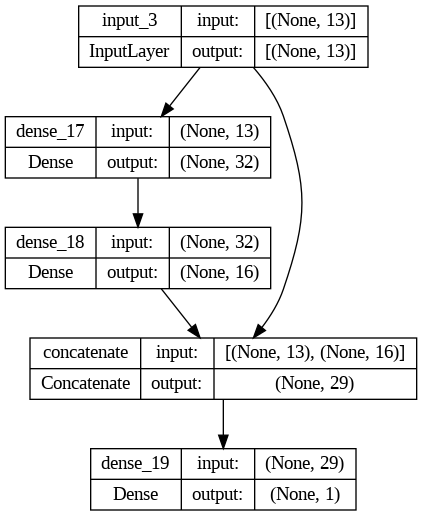

In [24]:
keras.utils.plot_model(model_WN, show_shapes=True)

In [25]:
model_WN.compile(loss = "mse", optimizer = 'adam', metrics = ["RootMeanSquaredError"])
history_WN = model_WN.fit(x_train_scaled, y_train, epochs=20, validation_data = (x_valid_scaled, y_valid))
mse_test, rmse_test = model_WN.evaluate(x_test_scaled, y_test)
x_new = x_test_scaled[:3]
y_predict = model_WN.predict(x_new)
print(y_predict)
print(mse_test)
print(rmse_test)

Epoch 1/20
10/10 [==============================] - 1s 24ms/step - loss: 641.0480 - root_mean_squared_error: 25.3189 - val_loss: 507.8644 - val_root_mean_squared_error: 22.5358
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 630.7308 - root_mean_squared_error: 25.1144 - val_loss: 499.6457 - val_root_mean_squared_error: 22.3528
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 620.7928 - root_mean_squared_error: 24.9157 - val_loss: 491.5075 - val_root_mean_squared_error: 22.1700
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 610.7300 - root_mean_squared_error: 24.7130 - val_loss: 482.6817 - val_root_mean_squared_error: 21.9700
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 599.3033 - root_mean_squared_error: 24.4807 - val_loss: 472.5575 - val_root_mean_squared_error: 21.7384
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 585.5770 - root_mean_squared_error: 24.1987 - v

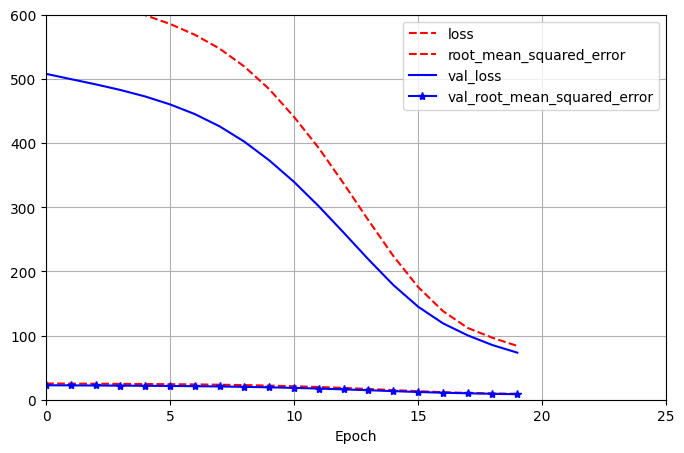

In [26]:
pd.DataFrame(history_WN.history).plot(
figsize = (8,5), xlim =[0,25], ylim = [0,600], grid = True, xlabel = 'Epoch', style= ["r--", "r--", "b-", "b-*"] )
plt.show()

# Hyperparameter Tuning Experiments
### Hyperparameters  

Hyperparameters are parameters set **before** the learning process begins and play a critical role in shaping the performance, speed, and quality of machine learning models. Unlike model parameters, which are learned during training, hyperparameters must be defined explicitly and often require experimentation to find the most effective combination.  

#### Key Neural Network Hyperparameters:  

1. **Number of Hidden Layers**  
   Determines the depth of the model, influencing its capacity to learn complex patterns.  

2. **Number of Neurons**  
   Defines the computational units in each layer, affecting the model's ability to represent data.  

3. **Learning Rate**  
   Controls the step size at which the model updates weights during optimization.  

4. **Activation Function**  
   Decides how neuron outputs are transformed, introducing non-linearity to the model.  

5. **Optimizer Settings**  
   Influences how the model adjusts weights, with popular choices being SGD, Adam, and RMSprop.  

#### Advanced Hyperparameters:  

1. **Dropout Rate**  
   Introduces regularization by randomly deactivating neurons during training, preventing overfitting.  

2. **Batch Size**  
   Determines the number of samples processed before updating the model's weights.  

3. **Weight Initialization**  
   Impacts how the initial weights of the model are set, influencing convergence speed and stability.  

4. **Learning Rate Scheduler**  
   Adjusts the learning rate dynamically during training to improve optimization.  

#### Importance of Hyperparameter Tuning  

Hyperparameter optimization is the process of finding the best combination of hyperparameters to minimize a predefined loss function and achieve optimal model performance. This involves systematic experimentation, often using techniques like grid search, random search, or Bayesian optimization.  

#### Key Hyperparameters to Tune:  

- **num_hidden_layers**: Controls the network's depth.  
- **neurons_per_layer**: Balances complexity and computational cost.  
- **dropout_rate**: Prevents overfitting while maintaining learning efficiency.  
- **activation**: Determines non-linear transformations for better learning.  
- **optimizer**: Influences gradient computation and convergence.  
- **learning_rate**: Adjusts the step size for weight updates.  
- **batch_size**: Impacts training stability and speed.  

---

### Loss Function  

The **Mean Squared Error (MSE)** is used as the score/loss function in this assignment to evaluate the performance of the model. It calculates the average squared difference between predicted and actual values, offering insights into the model's accuracy.  

#### Why MSE?  

- **Interpretability**: Taking the square root of MSE yields the Root Mean Squared Error (RMSE), an error metric easily understood in the context of real-world problems, such as predicting prices in thousands of dollars.  
- **Sensitivity to Errors**: Squaring amplifies larger errors, encouraging the model to minimize significant deviations.  

#### Cross-Validation for Evaluation  

In this assignment, we will use **Cross-Validation (CV)** to calculate the MSE for different hyperparameter combinations. This approach ensures robust evaluation by splitting the data into multiple training and validation sets, reducing the likelihood of overfitting or biased results.  

#### Notes:  

- Results may vary due to the stochastic nature of optimization algorithms, evaluation procedures, or differences in numerical precision.  
- Document the hyperparameter search process, justify the choices made, and analyze their impact on the final model performance.  

By understanding and tuning hyperparameters effectively, we can significantly enhance the quality and reliability of your neural network model.  



## Model 1 

In [27]:

input_ = Input(shape=x_train_scaled.shape[1:])
def model_1():
    model = tf.keras.Sequential([input_, tf.keras.layers.Dense(64, activation="relu"), tf.keras.layers.Dense(64, activation="relu"), tf.keras.layers.Dense(1)])
    model.compile(loss = "mae", optimizer = 'adam', metrics = ["mae"])
    return model



keras_regressor = KerasRegressor(build_fn=model_1, epochs=100, batch_size=32, verbose=0)

# Define the KFold cross-validator
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the scoring function
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation and calculate MAE
scores = cross_val_score(keras_regressor, x_train_scaled, y_train, cv=kfold, scoring=mae_scorer)
mae_scores = -scores

print(f"MAE scores for each fold: {mae_scores}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Standard Deviation of MAE: {np.std(mae_scores)}")

# Train the model on the full training data
history = keras_regressor.fit(x_train_scaled, y_train, validation_split = 0.2, verbose=1)

# Evaluate the model on the test set
y_pred_test = keras_regressor.predict(x_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)

<ipython-input-27-109ad077f377>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=model_1, epochs=100, batch_size=32, verbose=0)


MAE scores for each fold: [2.49346765 2.43775284 2.95604867]
Mean MAE: 2.6290897224602525
Standard Deviation of MAE: 0.2323110709049191
Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 21.9056 - mae: 21.9056 - val_loss: 23.2294 - val_mae: 23.2294
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 21.0393 - mae: 21.0393 - val_loss: 22.3384 - val_mae: 22.3384
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 20.0065 - mae: 20.0065 - val_loss: 21.2002 - val_mae: 21.2002
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 18.6318 - mae: 18.6318 - val_loss: 19.6731 - val_mae: 19.6731
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 16.8105 - mae: 16.8105 - val_loss: 17.6564 - val_mae: 17.6564
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 14.5866 - mae: 14.5866 - val_loss: 15.2170 - val_mae: 15.2170
Epoch 7/100
8/8 [==============================] - 0s 7ms/step -

#Learning curves

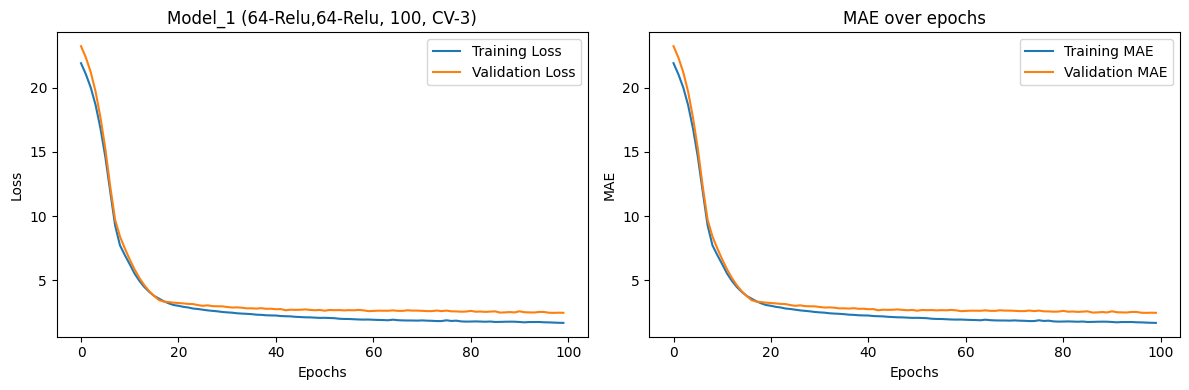

In [28]:
# Plot learning curves

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model_1 (64-Relu,64-Relu, 100, CV-3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Model 2 [2 points]


In [29]:

input_ = Input(shape=x_train_scaled.shape[1:])
def model_2():
    model = tf.keras.Sequential([input_, tf.keras.layers.Dense(128, activation="relu"), tf.keras.layers.Dense(64, activation="relu"), tf.keras.layers.Dense(1)])
    model.compile(loss = "mae", optimizer = 'adam', metrics = ["mae"])
    return model



keras_regressor = KerasRegressor(build_fn=model_2, epochs=100, batch_size=32, verbose=0)

# Define the KFold cross-validator
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the scoring function
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation and calculate MAE
scores = cross_val_score(keras_regressor, x_train_scaled, y_train, cv=kfold, scoring=mae_scorer)
mae_scores = -scores

print(f"MAE scores for each fold: {mae_scores}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Standard Deviation of MAE: {np.std(mae_scores)}")

# Train the model on the full training data
history = keras_regressor.fit(x_train_scaled, y_train, validation_split = 0.2, verbose=1)

# Evaluate the model on the test set
y_pred_test = keras_regressor.predict(x_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)

<ipython-input-29-78f0b4602c48>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=model_2, epochs=100, batch_size=32, verbose=0)


MAE scores for each fold: [2.47713206 2.53595901 2.96359663]
Mean MAE: 2.6588958976292374
Standard Deviation of MAE: 0.21679030305597408
Epoch 1/100
8/8 [==============================] - 1s 42ms/step - loss: 21.6754 - mae: 21.6754 - val_loss: 22.8120 - val_mae: 22.8120
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 20.3277 - mae: 20.3277 - val_loss: 21.3738 - val_mae: 21.3738
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 18.6467 - mae: 18.6467 - val_loss: 19.4793 - val_mae: 19.4793
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 16.4631 - mae: 16.4631 - val_loss: 17.2789 - val_mae: 17.2789
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 14.1108 - mae: 14.1108 - val_loss: 14.8321 - val_mae: 14.8321
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 11.7318 - mae: 11.7318 - val_loss: 11.7782 - val_mae: 11.7782
Epoch 7/100
8/8 [==============================] - 0s 14ms/

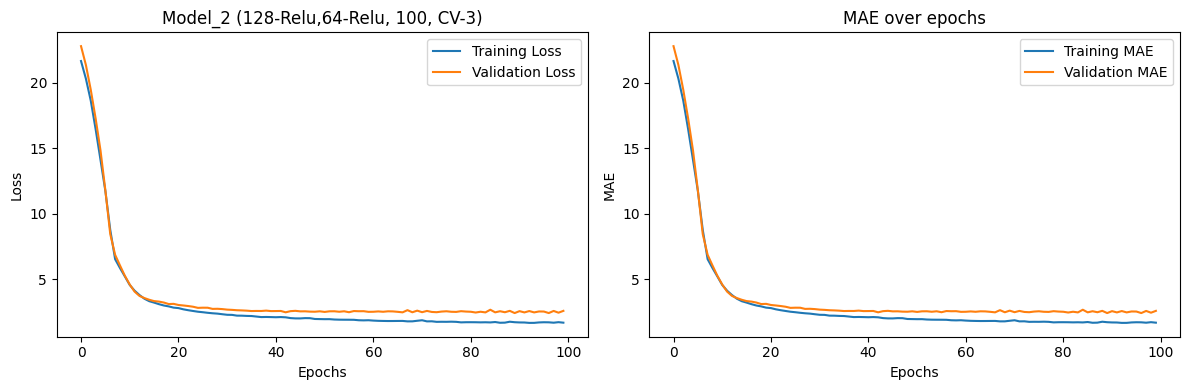

In [30]:
# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model_2 (128-Relu,64-Relu, 100, CV-3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Model 3 ]



In [31]:
input_ = Input(shape=x_train_scaled.shape[1:])

def model_3():
    model= tf.keras.Sequential([input_, tf.keras.layers.Dense(128, activation="tanh"), tf.keras.layers.Dense(64, activation="tanh"), tf.keras.layers.Dense(1)])
    model.compile(loss = "mae", optimizer = 'adam', metrics = ["mae"])
    return model



keras_regressor = KerasRegressor(build_fn=model_2, epochs=100, batch_size=32, verbose=0)

# Define the KFold cross-validator
kfold = KFold(n_splits=3, shuffle=True, random_state=32)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation and calculate MAE
scores = cross_val_score(keras_regressor, x_train_scaled, y_train, cv=kfold, scoring=mae_scorer)
mae_scores = -scores

print(f"MAE scores for each fold: {mae_scores}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Standard Deviation of MAE: {np.std(mae_scores)}")

# Train the model on the full training data
history = keras_regressor.fit(x_train_scaled, y_train, validation_split = 0.2, verbose=1)

# Evaluate the model on the test set
y_pred_test = keras_regressor.predict(x_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)


<ipython-input-31-211b9d0b930a>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=model_2, epochs=100, batch_size=32, verbose=0)


MAE scores for each fold: [2.36978246 2.90815699 2.20546659]
Mean MAE: 2.4944686785782917
Standard Deviation of MAE: 0.3001149103741691
Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 22.0965 - mae: 22.0965 - val_loss: 23.3372 - val_mae: 23.3372
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 21.0579 - mae: 21.0579 - val_loss: 22.2816 - val_mae: 22.2816
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 19.8126 - mae: 19.8126 - val_loss: 20.8642 - val_mae: 20.8642
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 18.0807 - mae: 18.0807 - val_loss: 18.9001 - val_mae: 18.9001
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 15.7819 - mae: 15.7819 - val_loss: 16.3951 - val_mae: 16.3951
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 13.0645 - mae: 13.0645 - val_loss: 13.3573 - val_mae: 13.3573
Epoch 7/100
8/8 [==============================] - 0s 9ms/step

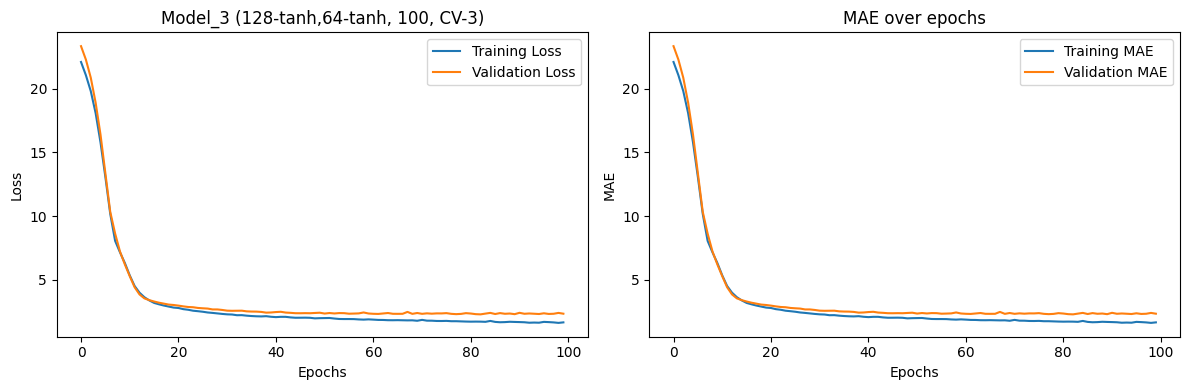

In [32]:
# Plot learning curves

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model_3 (128-tanh,64-tanh, 100, CV-3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Model 4

In [33]:
from tensorflow.keras.optimizers import RMSprop

input_ = Input(shape=x_train_scaled.shape[1:])
def model_4 ():
    model = tf.keras.Sequential([input_, tf.keras.layers.Dense(128, activation="relu"), tf.keras.layers.Dense(64, activation="relu"), tf.keras.layers.Dense(1)])
    model.compile(loss = "mae", optimizer = 'RMSprop', metrics = ["mae"])
    return model

keras_regressor = KerasRegressor(build_fn=model_4, epochs=100, batch_size=32, verbose=0)

# Define the KFold cross-validator
kfold = KFold(n_splits=3, shuffle=True, random_state=32)

# Define the scoring function
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation and calculate MAE
scores = cross_val_score(keras_regressor, x_train_scaled, y_train, cv=kfold, scoring=mae_scorer)
mae_scores = -scores  # convert negative MAE scores back to positive

print(f"MAE scores for each fold: {mae_scores}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Standard Deviation of MAE: {np.std(mae_scores)}")

# Train the model on the full training data
history = keras_regressor.fit(x_train_scaled, y_train, validation_split = 0.2, verbose=1)

# Evaluate the model on the test set
y_pred_test = keras_regressor.predict(x_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)

<ipython-input-33-69e5233d35b5>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=model_4, epochs=100, batch_size=32, verbose=0)


MAE scores for each fold: [2.31572408 2.9126671  2.27889478]
Mean MAE: 2.502428652823168
Standard Deviation of MAE: 0.2904717817283245
Epoch 1/100
8/8 [==============================] - 1s 29ms/step - loss: 21.3083 - mae: 21.3083 - val_loss: 21.6945 - val_mae: 21.6945
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 18.8869 - mae: 18.8869 - val_loss: 19.2270 - val_mae: 19.2270
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 16.3048 - mae: 16.3048 - val_loss: 16.5435 - val_mae: 16.5435
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 13.4957 - mae: 13.4957 - val_loss: 13.4969 - val_mae: 13.4969
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 10.5537 - mae: 10.5537 - val_loss: 10.3582 - val_mae: 10.3582
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 8.1186 - mae: 8.1186 - val_loss: 8.2118 - val_mae: 8.2118
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss:

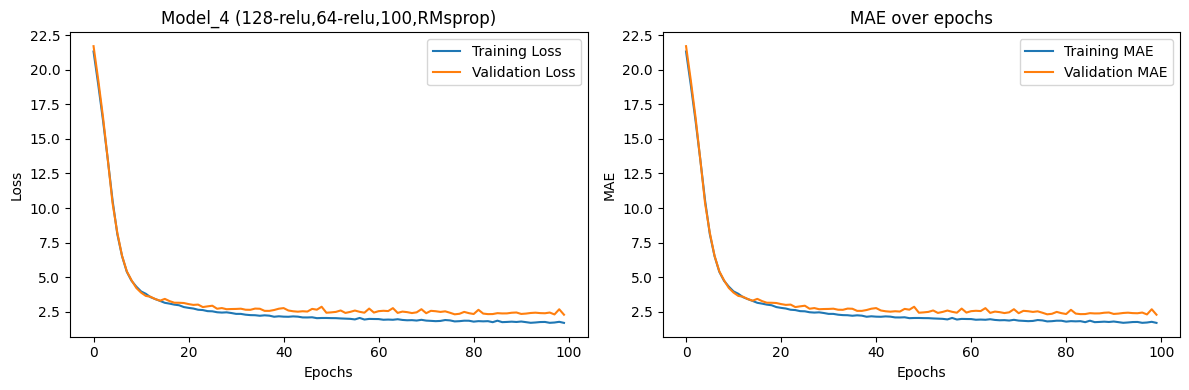

In [34]:
# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model_4 (128-relu,64-relu,100,RMsprop)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()